# Coursework II Question 2 - WISCONSIN CANCER CLASSIFICATION STUDY

Please List Members of Team and Student IDs below:

Member 1:

Member 2:

Member 3:

Which member of the team is responsible for this notebook: wei_52278

## INSTRUCTIONS

This is a well-known dataset on predicting cancer. It involves the analysis of tumours. A tumour can be benign (not cancerous) or malignant (cancerous). Using various geometrical measurements of actual tumours, the objective is to determine whether or not a tumour is benign or malignant.

The purpose of this question is to find the best model for predicting malignancy correctly. The data is provided by Sklearn using

from sklearn.datasets import load_breast_cancer

Some of the data fields are differently scaled values. In the following you are to 

1 - Load the data into a Pandas dataframe **OK

2 - Examine the dataframe for missing data and decide how to treat these **no missing data

3 - Try to see which features have the best explanatory power.  **using linReg and logiReg function_OK

4 - Also, deal with categorical data and use feature standardization ** 

5 - Choose metrics for model evaluation **confusion matrix?

6 - Use the following models - Logistic Regression, KNN (test for different values of K), Decision Tree and SVM Classifier

7 - Use training and testing to identify the best model **performance valuation: metrics and other

8 - Write a summary explaining your results.

###############################################################

In [92]:
from sklearn.datasets import load_breast_cancer

In [146]:
import matplotlib.pyplot as plt

In [93]:
import pandas as pd

In [94]:
cancer = load_breast_cancer()

In [95]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [96]:
df['target'] = pd.DataFrame(cancer.target)

the most explainatory power

In [101]:
import linReg_mstV2 as linMst
import logiReg_mstV2 as logiMst

In [98]:
logiMst.theMstI(df, 'target')

,Accuracy
mean radius,0.970760
mean texture,0.959064
mean perimeter,0.959064
mean area,0.959064
mean smoothness,0.964912
mean compactness,0.964912
mean concavity,0.964912
mean concave points,0.964912
mean symmetry,0.964912
mean fractal dimension,0.964912


In [102]:
linMst.theMstI(df, 'target')

(                         Accuracy
 mean radius              0.786822
 mean texture             0.790084
 mean perimeter           0.787851
 mean area                0.789792
 mean smoothness          0.790007
 mean compactness         0.787860
 mean concavity           0.789835
 mean concave points      0.789986
 mean symmetry            0.789932
 mean fractal dimension   0.788288
 radius error             0.789917
 texture error            0.787358
 perimeter error          0.789855
 area error               0.790154
 smoothness error         0.782439
 compactness error        0.790161
 concavity error          0.789326
 concave points error     0.789904
 symmetry error           0.787895
 fractal dimension error  0.790133
 worst radius             0.782247
 worst texture            0.787061
 worst perimeter          0.789254
 worst area               0.785216
 worst smoothness         0.790111
 worst compactness        0.789686
 worst concavity          0.790133
 worst concave point

In [103]:
df = df.drop(['target'], axis=1)

    using both logistic regression and linear regression on raw data, many feature has similar explanatory power, 
    mean radius has the most important explainatory power in linear regression.

In [104]:
y = cancer.target

Assign the kind to feature dataframe

In [105]:
print (cancer.target_names)

['malignant' 'benign']


In [106]:
kind = []
for i in y:
    name = cancer['target_names'][i]
    kind.append(name)

In [107]:
df['kind'] = kind

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

to perform standardisation

In [109]:
from sklearn import preprocessing

In [110]:
df_4scale = df.drop(['kind'], axis=1)

In [111]:
scaler = preprocessing.StandardScaler()

In [114]:
df_scaled = scaler.fit_transform(df_4scale)
df_scaled = pd.DataFrame(df_scaled, columns=df_4scale.columns)

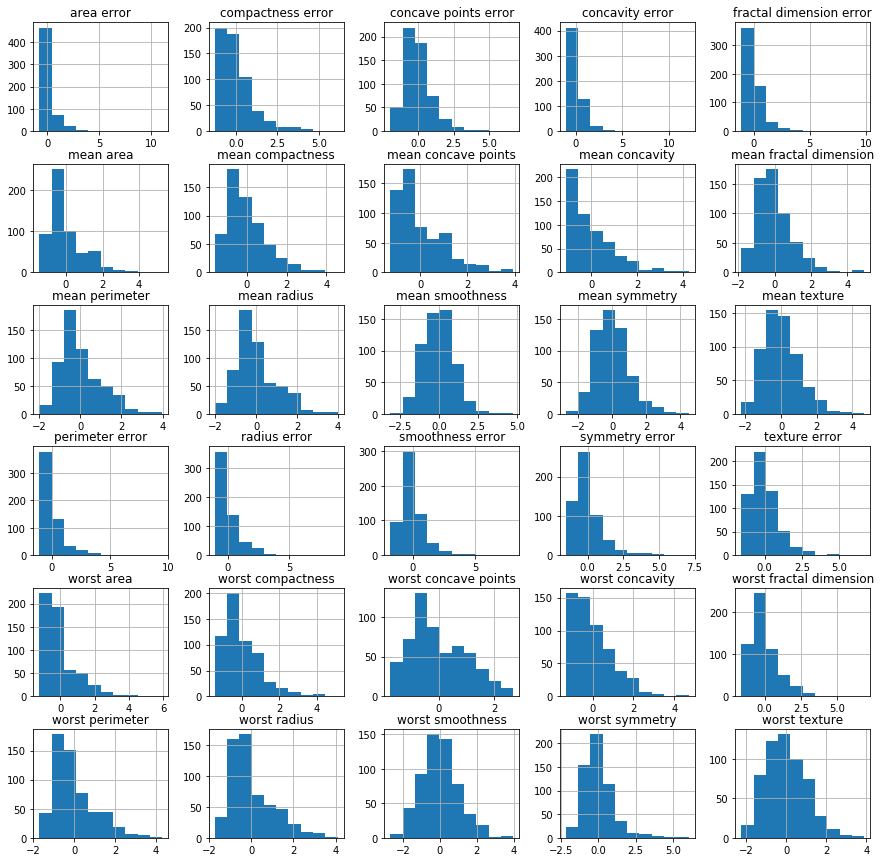

In [118]:
df_scaled.hist(figsize=(15, 15));

start the model fitting

In [120]:
from sklearn.model_selection import train_test_split

In [119]:
X = df_scaled.copy()

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1278)

## Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression

In [124]:
logRe = LogisticRegression(solver='lbfgs', max_iter = 10000)

In [125]:
logRe.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [126]:
y_pred = logRe.predict(X_train)

In [127]:
y_pred_test = logRe.predict(X_test)

Accuracy

In [135]:
print ('trainning sample accuracy: %.3f'%logRe.score(X_train, y_train),
       ', '
       'testing sample accuracy: %.3f' %logRe.score(X_test, y_test))

trainning sample accuracy: 0.992 , testing sample accuracy: 0.977


Recall

In [136]:
from sklearn.metrics import classification_report

In [140]:
print('trainning sample_ other metrics')
print(classification_report(y_train, y_pred))
print('')
print('testing sample_ other metrics')
print(classification_report(y_test, y_pred_test))
      

trainning sample_ other metrics
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       153
           1       0.99      1.00      0.99       245

   micro avg       0.99      0.99      0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398


testing sample_ other metrics
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        59
           1       0.97      1.00      0.98       112

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Confusion Matrix

In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
cm_train = confusion_matrix(y_train, y_pred)

In [141]:
import HelpfulFunctions as hp

[[150   3]
 [  0 245]]


<Figure size 720x720 with 0 Axes>

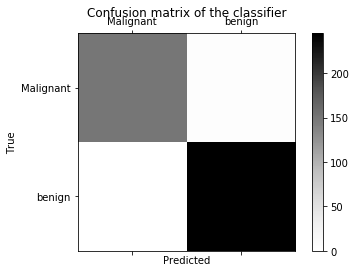

In [147]:
hp.print_cm(cm_train, ['Malignant', 'benign'], plt);

In [148]:
cm_test = confusion_matrix(y_test, y_pred_test)

[[ 55   4]
 [  0 112]]


<Figure size 720x720 with 0 Axes>

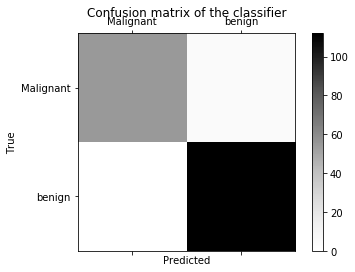

In [149]:
hp.print_cm(cm_test, ['Malignant', 'benign'], plt);

## KNN with different Ks

In [150]:
from sklearn.neighbors import KNeighborsClassifier

In [151]:
K = 3

In [152]:
clf = KNeighborsClassifier(K)

In [153]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [154]:
y_pred = clf.predict(X_train)

KNN_confusion_matrix

In [155]:
cm_train = confusion_matrix(y_train, y_pred)

[[146   7]
 [  2 243]]


<Figure size 720x720 with 0 Axes>

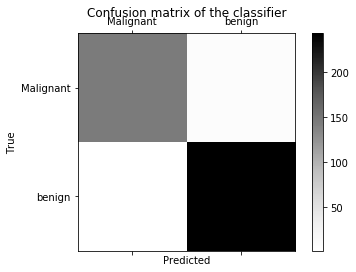

In [156]:
hp.print_cm(cm_train, ['Malignant', 'benign'], plt);

In [157]:
y_pred_test = clf.predict(X_test)

In [158]:
cm_test = confusion_matrix(y_test, y_pred_test)

[[ 52   7]
 [  3 109]]


<Figure size 720x720 with 0 Axes>

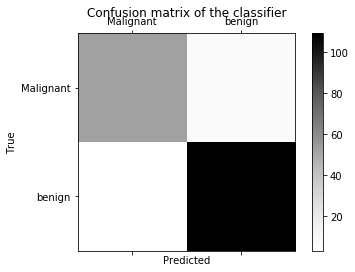

In [159]:
hp.print_cm(cm_test, ['Malignant', 'benign'], plt);

KNN_ accuracy

In [161]:
print ('trainning sample accuracy: %.3f'%clf.score(X_train, y_train),
       ', '
       'testing sample accuracy: %.3f' %clf.score(X_test, y_test))

trainning sample accuracy: 0.977 , testing sample accuracy: 0.942


KNN_other_performance_valuation

In [162]:
print('trainning sample_ other metrics')
print(classification_report(y_train, y_pred))
print('')
print('testing sample_ other metrics')
print(classification_report(y_test, y_pred_test))

trainning sample_ other metrics
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       153
           1       0.97      0.99      0.98       245

   micro avg       0.98      0.98      0.98       398
   macro avg       0.98      0.97      0.98       398
weighted avg       0.98      0.98      0.98       398


testing sample_ other metrics
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        59
           1       0.94      0.97      0.96       112

   micro avg       0.94      0.94      0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



Using different K

In [177]:
cm_Ks = []
accus = []
for K in range(1, 10):
    clf = KNeighborsClassifier(K)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    cm_Ks.append(confusion_matrix(y_test, y_pred_test))
    accus.append(clf.score(X_test, y_test))

repo = pd.DataFrame({'confusion_matrix': cm_Ks,
                     'Accuracy': accus})
# repo['Accuracy'] = accus.reshape(-1,1)
# for i in range(9):
#     print('K = {}'.format(i+1))
#     print(cm_Ks[i])
#     print(accus)

In [178]:
print('Accuracy on test side on chaning K')
print(repo)

      confusion_matrix  Accuracy
0  [[55, 4], [3, 109]]  0.959064
1  [[55, 4], [6, 106]]  0.941520
2  [[52, 7], [3, 109]]  0.941520
3  [[52, 7], [4, 108]]  0.935673
4  [[52, 7], [2, 110]]  0.947368
5  [[52, 7], [3, 109]]  0.941520
6  [[51, 8], [3, 109]]  0.935673
7  [[52, 7], [5, 107]]  0.929825
8  [[52, 7], [3, 109]]  0.941520


Decision Tree

In [180]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
clf = DecisionTreeClassifier(max_depth=5, random_state=234)

In [182]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=234,
            splitter='best')

In [183]:
from graphviz import Source
from IPython.display import SVG

In [186]:
from sklearn.tree import export_graphviz

In [187]:
graph = Source(export_graphviz(clf, 
                                    out_file=None,
                                    feature_names=X_train.columns))

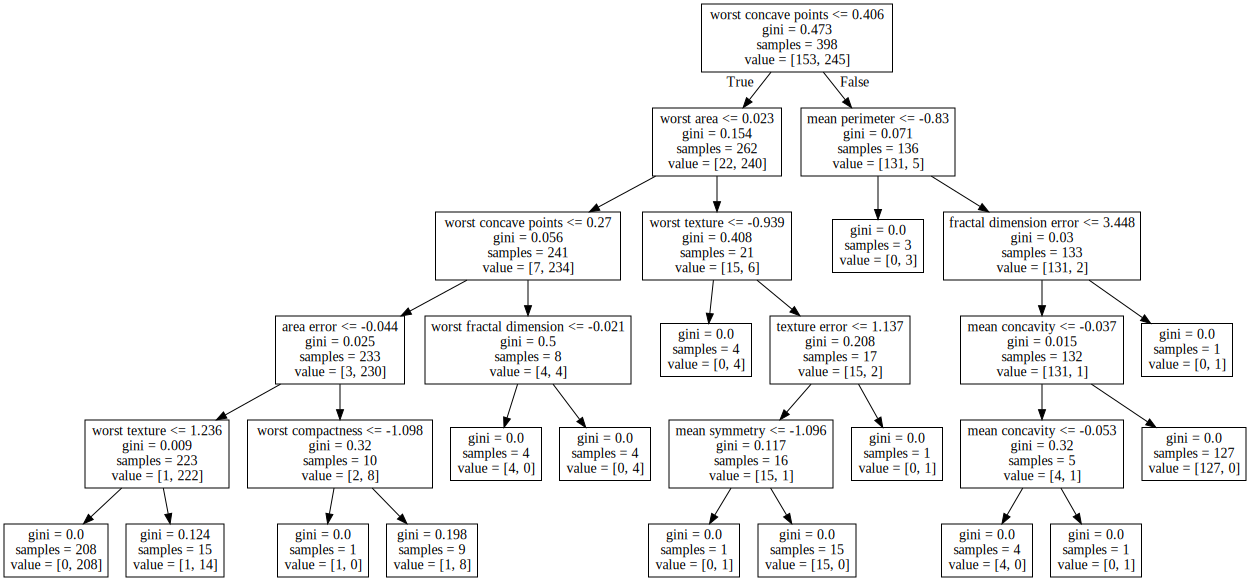

In [188]:
SVG(graph.pipe(format='svg'))

model_performance

In [189]:
y_pred = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [190]:
cm_train = confusion_matrix(y_train, y_pred)
cm_test = confusion_matrix(y_test, y_pred_test)

C_M on train side
[[151   2]
 [  0 245]]


<Figure size 720x720 with 0 Axes>

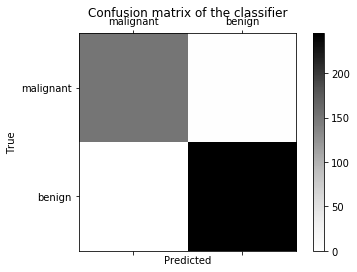

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       153
           1       0.99      1.00      1.00       245

   micro avg       0.99      0.99      0.99       398
   macro avg       1.00      0.99      0.99       398
weighted avg       1.00      0.99      0.99       398

Accuracy on train
0.9950

C_M on test side
[[ 55   4]
 [  9 103]]


<Figure size 720x720 with 0 Axes>

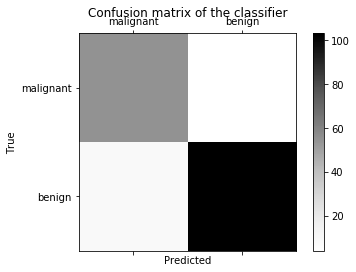

              precision    recall  f1-score   support

           0       0.86      0.93      0.89        59
           1       0.96      0.92      0.94       112

   micro avg       0.92      0.92      0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171

Accuracy on test
0.9240


In [196]:
print('C_M on train side')
# print(cm_train)
hp.print_cm(cm_train, ['malignant', 'benign'], plt)
print(classification_report(y_train, y_pred))
print('Accuracy on train')
print('%.4f'%(clf.score(X_train, y_train)))

print('')

print('C_M on test side')
# print(cm_test)
hp.print_cm(cm_test, ['malignant', 'benign'], plt)
print(classification_report(y_test, y_pred_test))
print('Accuracy on test')
print('%.4f'%clf.score(X_test, y_test))

SVM classifier

In [197]:
from sklearn.svm import SVC

In [198]:
clf = SVC(kernel='linear', C=100)

In [199]:
clf.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [200]:
y_pred = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [201]:
cm_train = confusion_matrix(y_train, y_pred)
cm_test = confusion_matrix(y_test, y_pred_test)

C_M on train side
[[153   0]
 [  0 245]]


<Figure size 720x720 with 0 Axes>

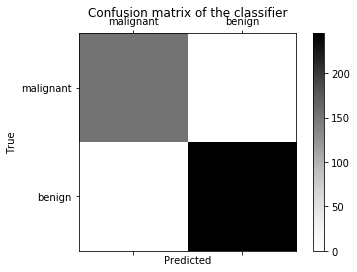

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       245

   micro avg       1.00      1.00      1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

Accuracy on train
1.0000

C_M on test side
[[ 54   5]
 [  6 106]]


<Figure size 720x720 with 0 Axes>

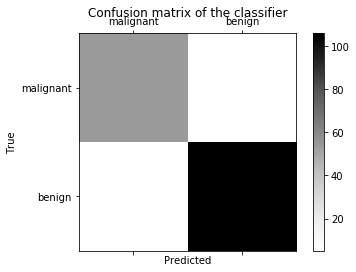

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        59
           1       0.95      0.95      0.95       112

   micro avg       0.94      0.94      0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

Accuracy on test
0.9357


In [202]:
# copy from above
print('C_M on train side')
# print(cm_train)
hp.print_cm(cm_train, ['malignant', 'benign'], plt)
print(classification_report(y_train, y_pred))
print('Accuracy on train')
print('%.4f'%(clf.score(X_train, y_train)))

print('')

print('C_M on test side')
# print(cm_test)
hp.print_cm(cm_test, ['malignant', 'benign'], plt)
print(classification_report(y_test, y_pred_test))
print('Accuracy on test')
print('%.4f'%clf.score(X_test, y_test))

A summary is needed!